In [4]:
using Pkg

In [5]:
Pkg.add("ImageFeatures")

    Updating registry at `C:\Users\valua\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [6]:
Pkg.add("TestImages")

   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [7]:
Pkg.add("Images")

   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [8]:
Pkg.add("ImageDraw")

   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [9]:
Pkg.add("CoordinateTransformations")

   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [10]:
Pkg.add("Rotations")

   Resolving package versions...
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\valua\.julia\environments\v1.7\Manifest.toml`


In [154]:
using ImageFeatures
using TestImages
using Images
using ImageDraw
using CoordinateTransformations
using Rotations

# BRISK

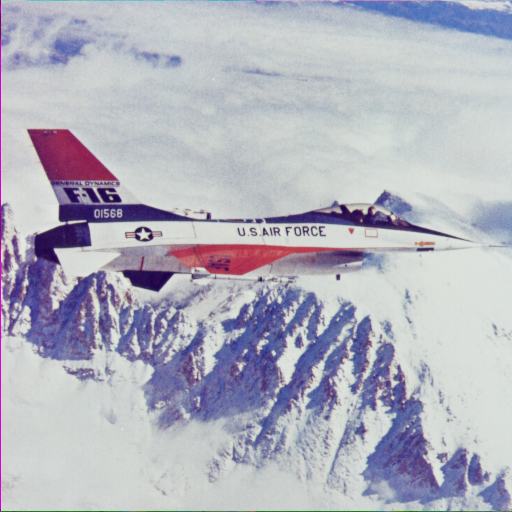

In [155]:
img=testimage("airplane") 

https://testimages.juliaimages.org/stable/imagelist/

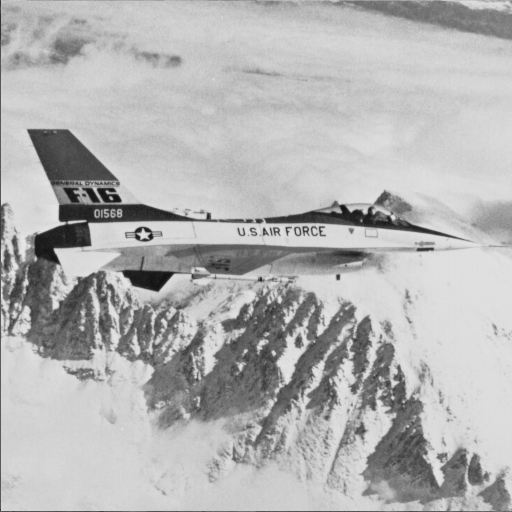

In [156]:
img1 = Gray.(img) #Aumento de contraste 

# Transformación

In [166]:
rot = recenter(RotMatrix(5pi/6), [size(img1)...] .÷ 2) #Rotación al rededor del centro  #Triple periods are a postfix operator that "splat" their arguments' contents into many arguments of a function call or declare a varargs function that "slurps" up many arguments into a single tuple

AffineMap([-0.8660254037844387 -0.49999999999999994; 0.49999999999999994 -0.8660254037844387], [605.7025033688162, 349.70250336881634])

In [167]:
tform = rot ∘ Translation(-50, -40) #Traslación de la imagen #Composición 

AffineMap([-0.8660254037844387 -0.49999999999999994; 0.49999999999999994 -0.8660254037844387], [669.0037735580381, 359.34351952019387])

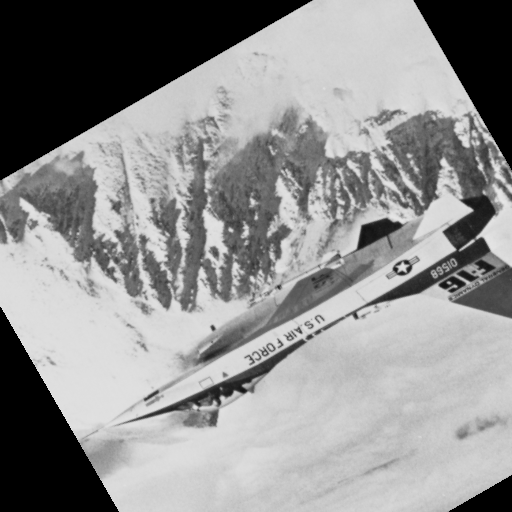

In [11]:
# Distorción de la imagen. Aplicar rotación y translación 
img2 = warp(img1, tform, axes(img1))

# Keypoints 

In [168]:
#Transformar a imagen de valores booleanos (algoritmo de detección FASTCORNERS)
#Threshold manera sencilla de segmentación de imagen (Fondo e imagen) (Brillo constante) (Umbral) 
#Features retorna un vector de características de los valores verdaderos de los valores booleanos de la imagen
#Feature tiene keypoint, su orientación y escala 

features_1 = Features(fastcorners(img1, 12, 0.35)) 
features_2 = Features(fastcorners(img2, 12, 0.35))

#Puntos identificables 

303-element Vector{Feature}:
 Feature(CartesianIndex(216, 49), 0.0, 0.0)
 Feature(CartesianIndex(254, 95), 0.0, 0.0)
 Feature(CartesianIndex(251, 105), 0.0, 0.0)
 Feature(CartesianIndex(251, 106), 0.0, 0.0)
 Feature(CartesianIndex(252, 106), 0.0, 0.0)
 Feature(CartesianIndex(262, 127), 0.0, 0.0)
 Feature(CartesianIndex(419, 138), 0.0, 0.0)
 Feature(CartesianIndex(400, 145), 0.0, 0.0)
 Feature(CartesianIndex(400, 146), 0.0, 0.0)
 Feature(CartesianIndex(399, 147), 0.0, 0.0)
 Feature(CartesianIndex(400, 147), 0.0, 0.0)
 Feature(CartesianIndex(399, 148), 0.0, 0.0)
 Feature(CartesianIndex(397, 150), 0.0, 0.0)
 ⋮
 Feature(CartesianIndex(155, 500), 0.0, 0.0)
 Feature(CartesianIndex(154, 501), 0.0, 0.0)
 Feature(CartesianIndex(155, 501), 0.0, 0.0)
 Feature(CartesianIndex(265, 510), 0.0, 0.0)
 Feature(CartesianIndex(191, 511), 0.0, 0.0)
 Feature(CartesianIndex(265, 511), 0.0, 0.0)
 Feature(CartesianIndex(266, 511), 0.0, 0.0)
 Feature(CartesianIndex(267, 511), 0.0, 0.0)
 Feature(CartesianIndex(1

In [1]:
fastcorners(img1, 12, 0.35)

LoadError: UndefVarError: fastcorners not defined

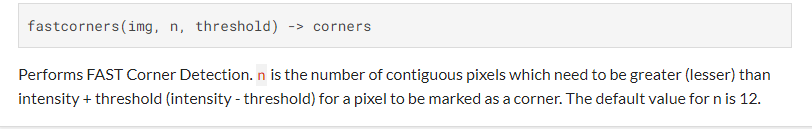

In [169]:
#Binary Robust Invariant Scalable Keypoints 
#Necesitamos definir los parámetros llamando al constructor Brisk 
brisk_params = BRISK() 
#Los pixeles son muestreados sobre anillos concéntricos, se examina la estructura de la imagen alrededor del keypoint 
#Invariante durante rotación 

BRISK(0.25, 4, 1.0, Vector{Tuple{Float16, Float16}}[[(0.0, 0.0), (0.0, 2.465), (1.449, 1.994), (2.344, 0.7617), (2.344, -0.7617), (1.449, -1.994), (0.0, -2.465), (-1.449, -1.994), (-2.344, -0.7617), (-2.344, 0.7617)  …  (0.0, -9.18), (-2.836, -8.734), (-5.395, -7.426), (-7.426, -5.395), (-8.734, -2.836), (-9.18, -0.0), (-8.734, 2.836), (-7.426, 5.395), (-5.395, 7.426), (-2.836, 8.734)], [(0.0, 0.0), (0.01512, 2.465), (1.461, 1.985), (2.35, 0.7476), (2.34, -0.776), (1.437, -2.004), (-0.01512, -2.465), (-1.461, -1.985), (-2.35, -0.7476), (-2.34, 0.776)  …  (-0.05634, -9.18), (-2.89, -8.71), (-5.44, -7.395), (-7.46, -5.35), (-8.75, -2.783), (-9.18, 0.05634), (-8.71, 2.89), (-7.395, 5.44), (-5.35, 7.46), (-2.783, 8.75)], [(0.0, 0.0), (0.03024, 2.465), (1.474, 1.977), (2.354, 0.733), (2.334, -0.7905), (1.424, -2.012), (-0.03024, -2.465), (-1.474, -1.977), (-2.354, -0.733), (-2.334, 0.7905)  …  (-0.1127, -9.18), (-2.943, -8.695), (-5.49, -7.36), (-7.492, -5.305), (-8.766, -2.729), (-9.18, 0.

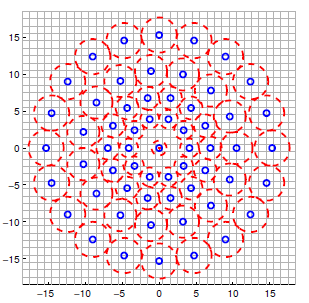

In [162]:
#Utilizamos la imagen con los Keypoints y los parámetros para crear la función descriptora 
#Se describe forma, color, textura, posición 

desc_1, ret_features_1 = create_descriptor(img1, features_1, brisk_params)
desc_2, ret_features_2 = create_descriptor(img2, features_2, brisk_params)

#heatmap...

(BitVector[[0, 0, 1, 0, 1, 1, 0, 1, 1, 0  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0  …  0, 1, 1, 0, 0, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 0, 0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0  …  1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 0, 1, 0, 1, 1, 0, 0, 0, 1]  …  [1, 1, 0, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 0, 1, 1, 1  …  0, 0, 0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 0, 1, 1, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0

In [170]:
# Los descriptores nos permiten hacer match entre las imágenes 

matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, 0.1)

34-element Vector{Vector{CartesianIndex{2}}}:
 [CartesianIndex(457, 425), CartesianIndex(216, 49)]
 [CartesianIndex(399, 393), CartesianIndex(251, 106)]
 [CartesianIndex(250, 433), CartesianIndex(400, 145)]
 [CartesianIndex(249, 432), CartesianIndex(400, 147)]
 [CartesianIndex(280, 338), CartesianIndex(326, 213)]
 [CartesianIndex(279, 338), CartesianIndex(327, 213)]
 [CartesianIndex(278, 338), CartesianIndex(328, 214)]
 [CartesianIndex(214, 374), CartesianIndex(402, 215)]
 [CartesianIndex(212, 375), CartesianIndex(403, 215)]
 [CartesianIndex(355, 275), CartesianIndex(230, 230)]
 [CartesianIndex(354, 274), CartesianIndex(230, 231)]
 [CartesianIndex(353, 274), CartesianIndex(231, 232)]
 [CartesianIndex(212, 351), CartesianIndex(392, 236)]
 ⋮
 [CartesianIndex(200, 113), CartesianIndex(283, 448)]
 [CartesianIndex(191, 115), CartesianIndex(292, 451)]
 [CartesianIndex(264, 60), CartesianIndex(201, 461)]
 [CartesianIndex(222, 85), CartesianIndex(250, 461)]
 [CartesianIndex(221, 86), Cartesian

34-element Vector{Matrix{Gray{N0f8}}}:
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.349) Gray{N0f8}(0.337) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 ⋮
 [Gray{N0f8}(0.255) Gray{N0f8}(0.78) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.212) Gray{N0f8}(0.769) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.267) Gray{N0f8}(0.839) … Gray{N0f8}(0.0) 
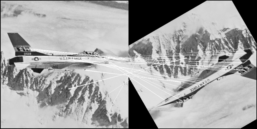
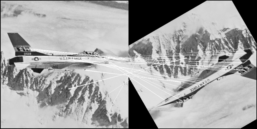
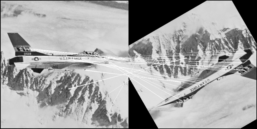
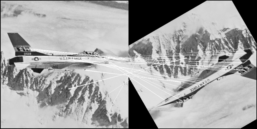
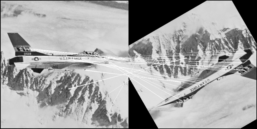
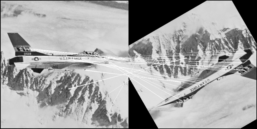
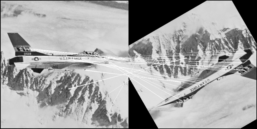
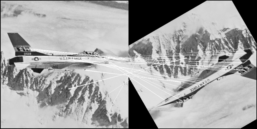
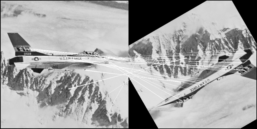
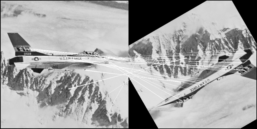
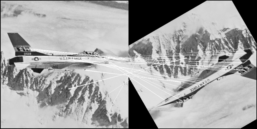
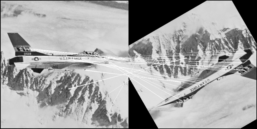
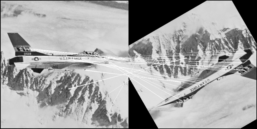
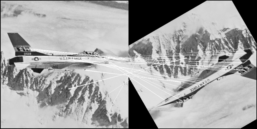
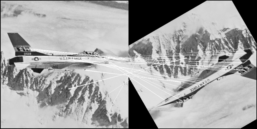
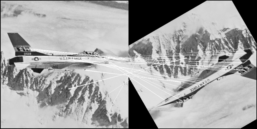
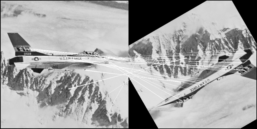
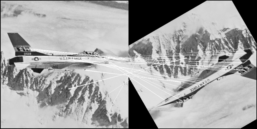
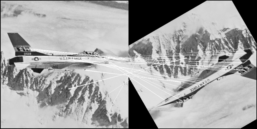
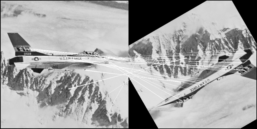
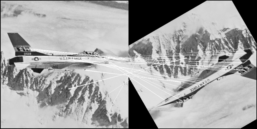
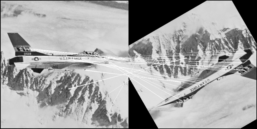
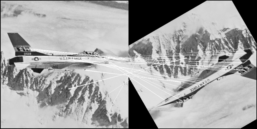
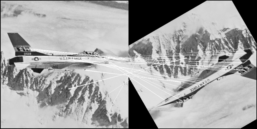
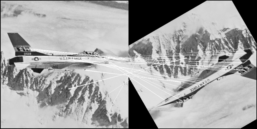
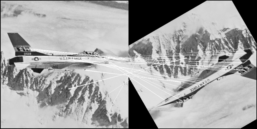
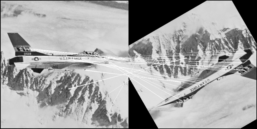
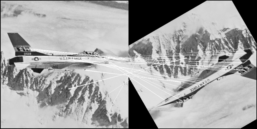
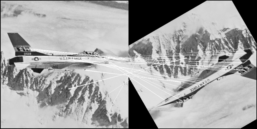
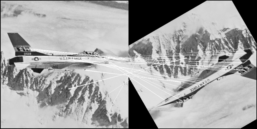
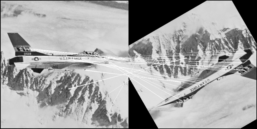
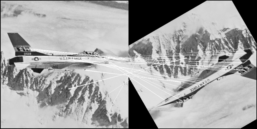
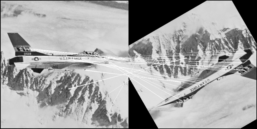
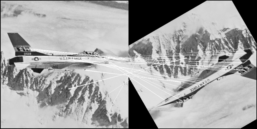

In [171]:
#Usando ImageDraw
grid = hcat(img1, img2)
offset = CartesianIndex(0, size(img1, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)

In [172]:
save("airfighter.jpg", grid); nothing

# Yu Takeuchi

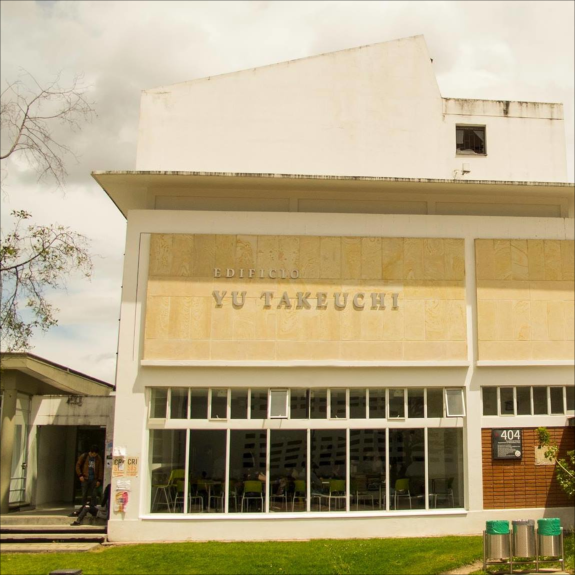

In [173]:
img_path="C:/Users/valua/Desktop/ImageFeatures/Yuta.jpg"
YUTA=load(img_path)

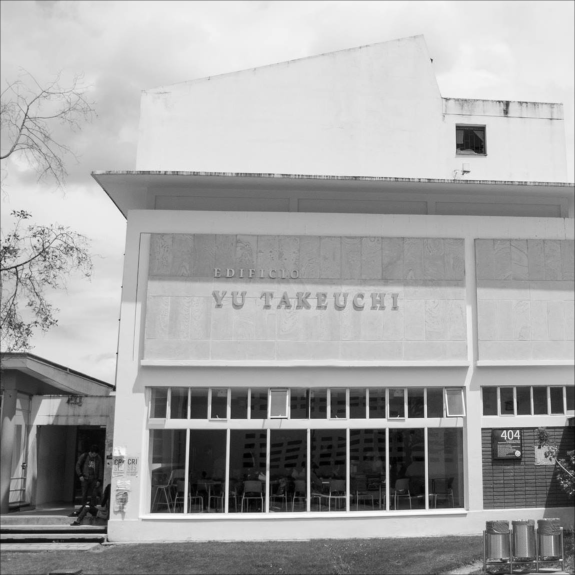

In [174]:
img3 = Gray.(YUTA) #Aumento de contraste 

# Transformación

In [175]:
rot = recenter(RotMatrix(7pi/6), [size(img3)...] .÷ 2) #Rotación 

AffineMap([-0.8660254037844388 0.4999999999999997; -0.4999999999999997 -0.8660254037844388], [784.0985817722681, 1358.0985817722676])

In [176]:
tform = rot ∘ Translation(-75, -32) #Translación 

AffineMap([-0.8660254037844388 0.4999999999999997; -0.4999999999999997 -0.8660254037844388], [833.050487056101, 1423.3113946933697])

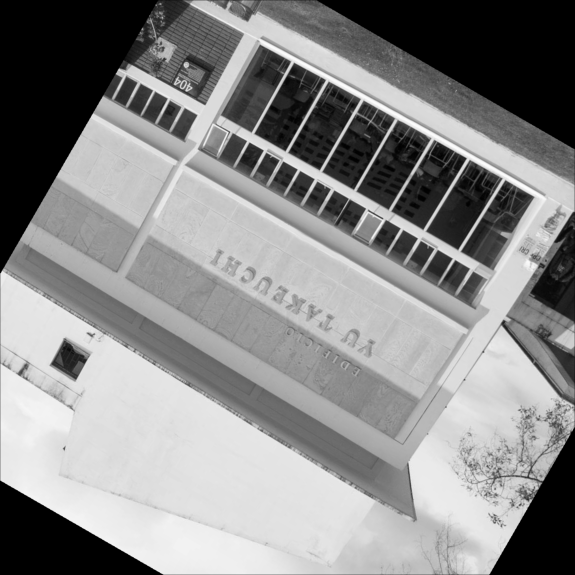

In [177]:
img4 = warp(img3, tform, axes(imgMG))

# Keypoints

In [178]:
features_3 = Features(fastcorners(img3, 12, 0.35)) 
features_4 = Features(fastcorners(img4, 12, 0.35))

756-element Vector{Feature}:
 Feature(CartesianIndex(708, 30), 0.0, 0.0)
 Feature(CartesianIndex(709, 32), 0.0, 0.0)
 Feature(CartesianIndex(607, 112), 0.0, 0.0)
 Feature(CartesianIndex(613, 122), 0.0, 0.0)
 Feature(CartesianIndex(897, 127), 0.0, 0.0)
 Feature(CartesianIndex(896, 128), 0.0, 0.0)
 Feature(CartesianIndex(897, 128), 0.0, 0.0)
 Feature(CartesianIndex(898, 128), 0.0, 0.0)
 Feature(CartesianIndex(899, 128), 0.0, 0.0)
 Feature(CartesianIndex(895, 129), 0.0, 0.0)
 Feature(CartesianIndex(896, 129), 0.0, 0.0)
 Feature(CartesianIndex(899, 129), 0.0, 0.0)
 Feature(CartesianIndex(900, 129), 0.0, 0.0)
 ⋮
 Feature(CartesianIndex(687, 1106), 0.0, 0.0)
 Feature(CartesianIndex(872, 1109), 0.0, 0.0)
 Feature(CartesianIndex(809, 1113), 0.0, 0.0)
 Feature(CartesianIndex(894, 1125), 0.0, 0.0)
 Feature(CartesianIndex(855, 1126), 0.0, 0.0)
 Feature(CartesianIndex(885, 1131), 0.0, 0.0)
 Feature(CartesianIndex(879, 1134), 0.0, 0.0)
 Feature(CartesianIndex(880, 1134), 0.0, 0.0)
 Feature(Cartesia

In [179]:
brisk_params = BRISK() 

BRISK(0.25, 4, 1.0, Vector{Tuple{Float16, Float16}}[[(0.0, 0.0), (0.0, 2.465), (1.449, 1.994), (2.344, 0.7617), (2.344, -0.7617), (1.449, -1.994), (0.0, -2.465), (-1.449, -1.994), (-2.344, -0.7617), (-2.344, 0.7617)  …  (0.0, -9.18), (-2.836, -8.734), (-5.395, -7.426), (-7.426, -5.395), (-8.734, -2.836), (-9.18, -0.0), (-8.734, 2.836), (-7.426, 5.395), (-5.395, 7.426), (-2.836, 8.734)], [(0.0, 0.0), (0.01512, 2.465), (1.461, 1.985), (2.35, 0.7476), (2.34, -0.776), (1.437, -2.004), (-0.01512, -2.465), (-1.461, -1.985), (-2.35, -0.7476), (-2.34, 0.776)  …  (-0.05634, -9.18), (-2.89, -8.71), (-5.44, -7.395), (-7.46, -5.35), (-8.75, -2.783), (-9.18, 0.05634), (-8.71, 2.89), (-7.395, 5.44), (-5.35, 7.46), (-2.783, 8.75)], [(0.0, 0.0), (0.03024, 2.465), (1.474, 1.977), (2.354, 0.733), (2.334, -0.7905), (1.424, -2.012), (-0.03024, -2.465), (-1.474, -1.977), (-2.354, -0.733), (-2.334, 0.7905)  …  (-0.1127, -9.18), (-2.943, -8.695), (-5.49, -7.36), (-7.492, -5.305), (-8.766, -2.729), (-9.18, 0.

In [180]:
desc_3, ret_features_3 = create_descriptor(img3, features_3, brisk_params)
desc_4, ret_features_4 = create_descriptor(img4, features_4, brisk_params)

(BitVector[[1, 1, 1, 1, 0, 0, 1, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 0, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 1, 1, 1  …  0, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1  …  1, 1, 1, 0, 1, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 0, 1, 0, 0, 1  …  1, 1, 1, 0, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 0, 0, 0, 0]  …  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1, 0, 1, 0, 0  …  0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 0, 0  …  1, 1, 1, 0, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0

In [181]:
matches = match_keypoints(Keypoints(ret_features_3), Keypoints(ret_features_4), desc_3, desc_4, 0.1)

20-element Vector{Vector{CartesianIndex{2}}}:
 [CartesianIndex(473, 36), CartesianIndex(1006, 1021)]
 [CartesianIndex(422, 44), CartesianIndex(1046, 989)]
 [CartesianIndex(436, 52), CartesianIndex(1030, 989)]
 [CartesianIndex(431, 60), CartesianIndex(1030, 980)]
 [CartesianIndex(431, 62), CartesianIndex(1029, 978)]
 [CartesianIndex(652, 73), CartesianIndex(832, 1079)]
 [CartesianIndex(656, 97), CartesianIndex(817, 1060)]
 [CartesianIndex(640, 240), CartesianIndex(759, 928)]
 [CartesianIndex(509, 249), CartesianIndex(868, 855)]
 [CartesianIndex(837, 542), CartesianIndex(437, 765)]
 [CartesianIndex(989, 861), CartesianIndex(146, 565)]
 [CartesianIndex(343, 938), CartesianIndex(667, 175)]
 [CartesianIndex(877, 1011), CartesianIndex(168, 379)]
 [CartesianIndex(877, 1038), CartesianIndex(154, 356)]
 [CartesianIndex(893, 1038), CartesianIndex(141, 364)]
 [CartesianIndex(893, 1086), CartesianIndex(117, 322)]
 [CartesianIndex(957, 1122), CartesianIndex(43, 323)]
 [CartesianIndex(957, 1123), Ca

20-element Vector{Matrix{Gray{N0f8}}}:
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.471) Gray{N0f8}(0.475) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.776) Gray{N0f8}(0.776) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.463) Gray{N0f8}(0.463) … Gray{
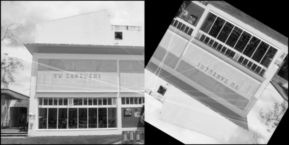
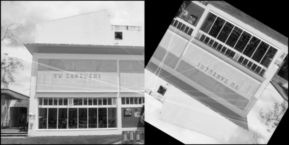
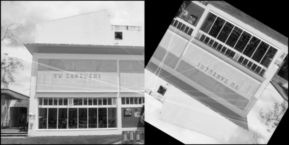
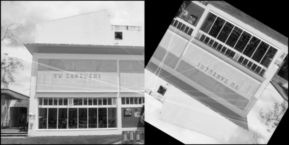
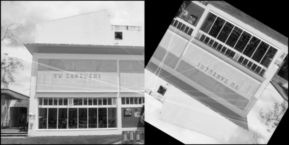
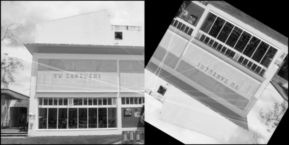
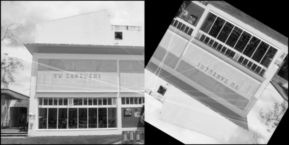
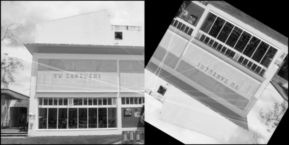
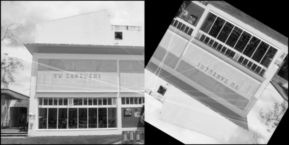
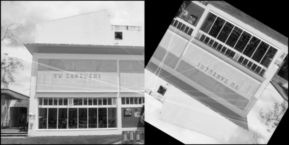
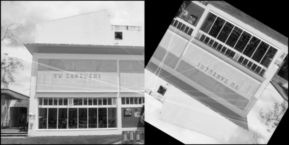
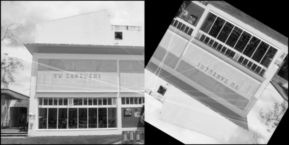
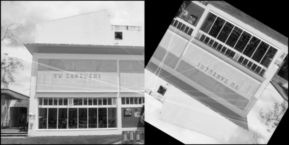
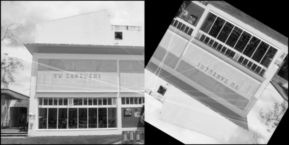
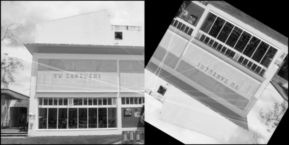
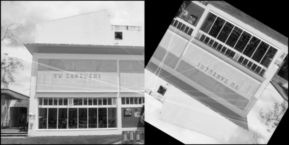
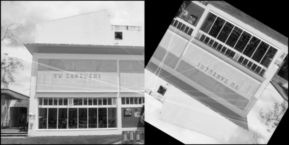
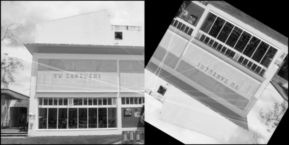
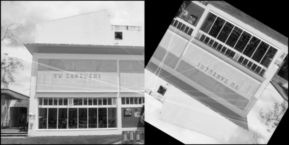
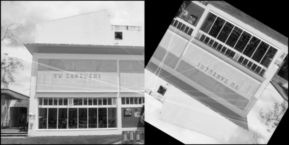

In [182]:
grid = hcat(img3, img4)
offset = CartesianIndex(0, size(img3, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)



In [83]:
save("YUTA.jpg", grid); nothing

# FREAK

(Fast REtinA Keypoint)
Utiliza una grilla de muestreo retinal 
https://docs.juliahub.com/ImageFeatures/JMzL1/0.4.5/tutorials/freak/

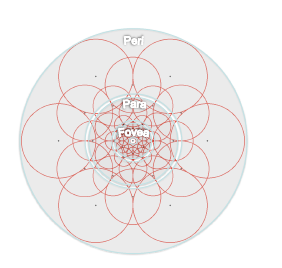

Similar a BRISK pero no usa "Long pairs", se usan 45 parejas de muestreo predefinido.
1. Las parejas se determinan usando un método similar a ORB (https://docs.juliahub.com/ImageFeatures/JMzL1/0.4.5/tutorials/orb/). 
2. Las parejas se muestrean sobre el conjunto de los keypoints de donde se extraen los más significativos 
3. Invaración en la rotación 

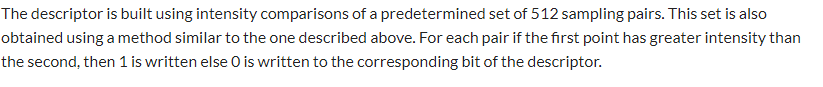

In [183]:
freak_params=FREAK()

FREAK(22.0, Vector{Tuple{Float16, Float16}}[[(0.0, 14.664), (12.7, 7.332), (12.7, -7.332), (0.0, -14.664), (-12.7, -7.332), (-12.7, 7.332), (5.5, 9.52), (11.0, 0.0), (5.5, -9.52), (-5.5, -9.52)  …  (-1.223, -2.117), (-2.445, -0.0), (-1.223, 2.117), (0.0, 1.833), (1.588, 0.9165), (1.588, -0.9165), (0.0, -1.833), (-1.588, -0.9165), (-1.588, 0.9165), (0.0, -0.0)], [(0.3599, 14.664), (12.875, 7.02), (12.516, -7.645), (-0.3599, -14.664), (-12.875, -7.02), (-12.516, 7.645), (5.73, 9.39), (11.0, -0.27), (5.266, -9.66), (-5.73, -9.39)  …  (-1.273, -2.086), (-2.443, 0.06), (-1.17, 2.146), (0.04498, 1.833), (1.609, 0.8774), (1.564, -0.9556), (-0.04498, -1.833), (-1.609, -0.8774), (-1.564, 0.9556), (-0.0, -0.0)], [(0.7197, 14.65), (13.05, 6.703), (12.33, -7.95), (-0.7197, -14.65), (-13.05, -6.703), (-12.33, 7.95), (5.96, 9.24), (10.984, -0.5396), (5.027, -9.78), (-5.96, -9.24)  …  (-1.324, -2.055), (-2.441, 0.11993), (-1.117, 2.174), (0.08997, 1.831), (1.631, 0.838), (1.541, -0.9937), (-0.08997, 

In [184]:
keypoints_3 = Keypoints(fastcorners(img3, 12, 0.35))
keypoints_4 = Keypoints(fastcorners(img4, 12, 0.35))

756-element Vector{CartesianIndex{2}}:
 CartesianIndex(708, 30)
 CartesianIndex(709, 32)
 CartesianIndex(607, 112)
 CartesianIndex(613, 122)
 CartesianIndex(897, 127)
 CartesianIndex(896, 128)
 CartesianIndex(897, 128)
 CartesianIndex(898, 128)
 CartesianIndex(899, 128)
 CartesianIndex(895, 129)
 CartesianIndex(896, 129)
 CartesianIndex(899, 129)
 CartesianIndex(900, 129)
 ⋮
 CartesianIndex(687, 1106)
 CartesianIndex(872, 1109)
 CartesianIndex(809, 1113)
 CartesianIndex(894, 1125)
 CartesianIndex(855, 1126)
 CartesianIndex(885, 1131)
 CartesianIndex(879, 1134)
 CartesianIndex(880, 1134)
 CartesianIndex(871, 1138)
 CartesianIndex(871, 1139)
 CartesianIndex(861, 1145)
 CartesianIndex(458, 1149)

In [185]:
desc_23, ret_keypoints_3 = create_descriptor(img3, keypoints_1, freak_params)
desc_24, ret_keypoints_4 = create_descriptor(img4, keypoints_2, freak_params)

(BitVector[[0, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 0, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 1, 0  …  1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 0, 1, 1, 1]  …  [1, 0, 1, 0, 1, 0, 1, 1, 0, 1  …  1, 0, 1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 0, 1, 1, 0, 0  …  1, 0, 1, 1, 1, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 1, 1, 1, 0  …  0, 0, 1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1

In [186]:
matches2= match_keypoints(ret_keypoints_3, ret_keypoints_4, desc_23, desc_24, 0.1)

39-element Vector{Vector{CartesianIndex{2}}}:
 [CartesianIndex(607, 25), CartesianIndex(895, 1098)]
 [CartesianIndex(422, 28), CartesianIndex(1054, 1003)]
 [CartesianIndex(423, 29), CartesianIndex(1053, 1002)]
 [CartesianIndex(430, 37), CartesianIndex(1042, 999)]
 [CartesianIndex(422, 45), CartesianIndex(1045, 988)]
 [CartesianIndex(425, 45), CartesianIndex(1042, 989)]
 [CartesianIndex(424, 48), CartesianIndex(1042, 986)]
 [CartesianIndex(431, 48), CartesianIndex(1036, 990)]
 [CartesianIndex(650, 49), CartesianIndex(846, 1099)]
 [CartesianIndex(435, 51), CartesianIndex(1030, 989)]
 [CartesianIndex(435, 52), CartesianIndex(1030, 988)]
 [CartesianIndex(689, 55), CartesianIndex(809, 1113)]
 [CartesianIndex(432, 62), CartesianIndex(1029, 979)]
 ⋮
 [CartesianIndex(869, 1004), CartesianIndex(179, 380)]
 [CartesianIndex(867, 1006), CartesianIndex(179, 379)]
 [CartesianIndex(865, 1007), CartesianIndex(180, 377)]
 [CartesianIndex(870, 1008), CartesianIndex(176, 378)]
 [CartesianIndex(875, 1017)

In [87]:
grid = hcat(img3, img4)
offset = CartesianIndex(0, size(imgMG, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)


In [187]:
save("YUTA2.jpg", grid); 

# Comparación

In [188]:
#FREAK
@time (desc_23,ret_keypoints_3)
@time (desc_24,ret_keypoints_4)

  0.000008 seconds (1 allocation: 32 bytes)
  0.000009 seconds (1 allocation: 32 bytes)


(BitVector[[0, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 0, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1, 1, 0  …  1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1, 0, 1  …  1, 0, 0, 1, 1, 1, 0, 1, 1, 1]  …  [1, 0, 1, 0, 1, 0, 1, 1, 0, 1  …  1, 0, 1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 1, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 0, 1, 1, 0, 0  …  1, 0, 1, 1, 1, 1, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 1, 1, 1, 0  …  0, 0, 1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 1, 0, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1

In [189]:
#BRISK
@time (desc_3, ret_features_3)
@time (desc_4, ret_features_4)

  0.000013 seconds (1 allocation: 32 bytes)
  0.000010 seconds (1 allocation: 32 bytes)


(BitVector[[1, 1, 1, 1, 0, 0, 1, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 0, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 1, 1, 1  …  0, 1, 0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1  …  1, 1, 1, 0, 1, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 0, 1, 0, 0, 1  …  1, 1, 1, 0, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 0, 0, 0, 0]  …  [1, 1, 1, 1, 1, 0, 1, 1, 0, 0  …  0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 1, 1, 0, 1, 0, 0  …  0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 1, 0, 1, 0, 0  …  1, 1, 1, 0, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0

# Imagen pesada

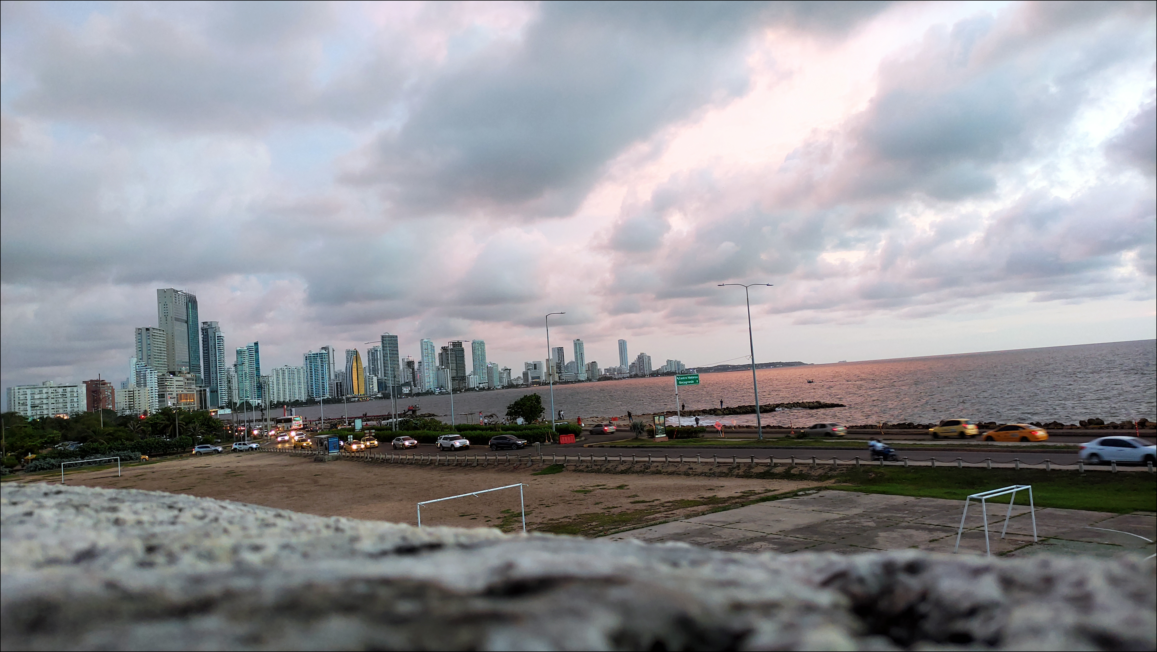

In [190]:
Img_path="C:/Users/valua/Desktop/ImageFeatures/CART.JPG"
CART=load(Img_path)

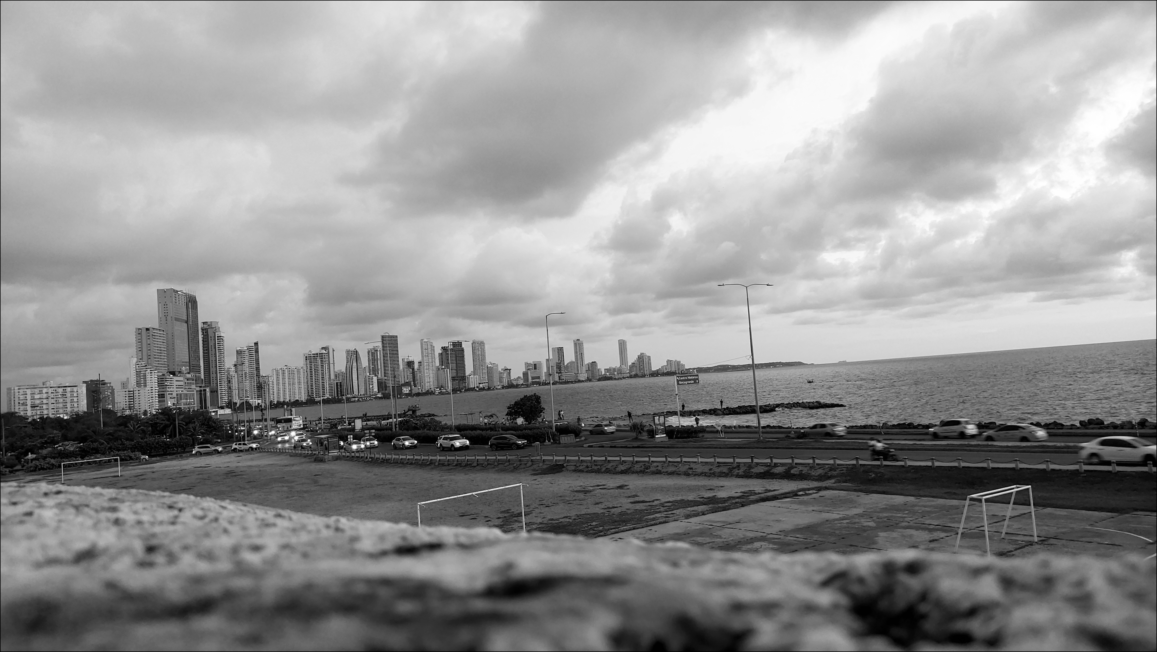

In [112]:
img5 =Gray.(CART)

In [191]:
rot= recenter(RotMatrix(8pi/6), [size(img5)...] .÷ 2) #Rotación 

AffineMap([-0.5000000000000004 0.8660254037844385; -0.8660254037844385 -0.5000000000000004], [-49.250733549621145, 4595.56507572734])

In [193]:
tform = rot ∘ Translation(21, 3) #Translación 

AffineMap([-0.5000000000000004 0.8660254037844385; -0.8660254037844385 -0.5000000000000004], [-57.15265733826784, 4575.878542247867])

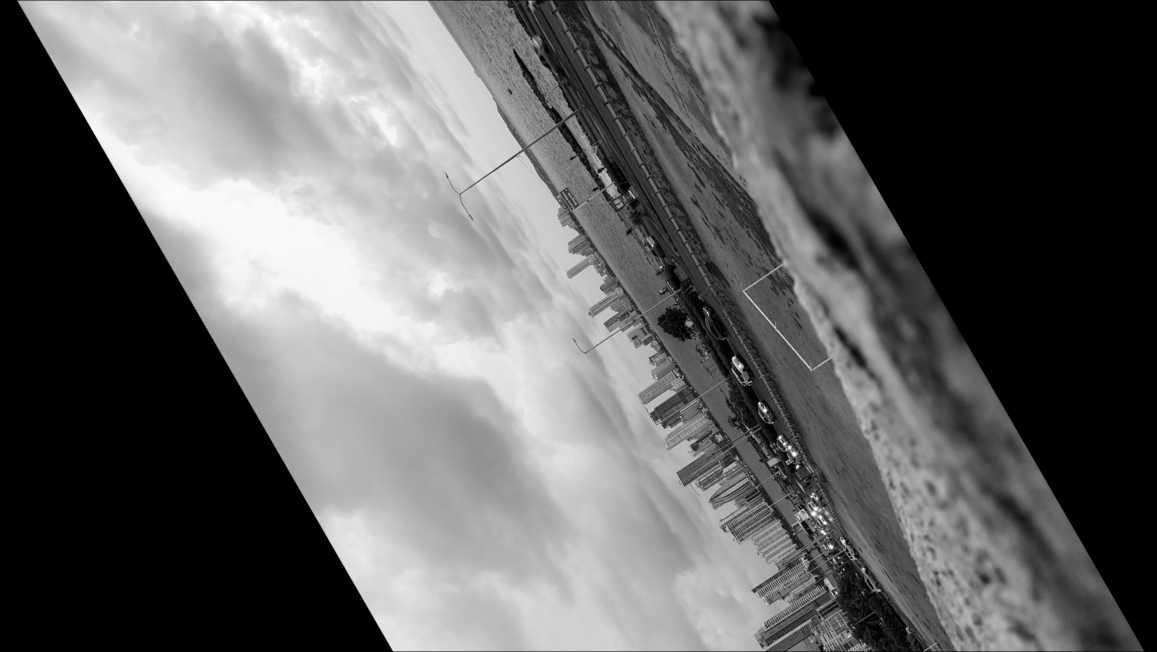

In [194]:
img6= warp(img5, tform, axes(img5))

In [195]:
features_5 = Features(fastcorners(img5, 12, 0.35)) 
features_6 = Features(fastcorners(img6, 12, 0.35))

20235-element Vector{Feature}:
 Feature(CartesianIndex(1, 68), 0.0, 0.0)
 Feature(CartesianIndex(1, 69), 0.0, 0.0)
 Feature(CartesianIndex(2, 69), 0.0, 0.0)
 Feature(CartesianIndex(3, 69), 0.0, 0.0)
 Feature(CartesianIndex(2, 70), 0.0, 0.0)
 Feature(CartesianIndex(3, 70), 0.0, 0.0)
 Feature(CartesianIndex(688, 1779), 0.0, 0.0)
 Feature(CartesianIndex(689, 1779), 0.0, 0.0)
 Feature(CartesianIndex(689, 1780), 0.0, 0.0)
 Feature(CartesianIndex(690, 1780), 0.0, 0.0)
 Feature(CartesianIndex(690, 1781), 0.0, 0.0)
 Feature(CartesianIndex(691, 1781), 0.0, 0.0)
 Feature(CartesianIndex(692, 1782), 0.0, 0.0)
 ⋮
 Feature(CartesianIndex(2580, 3731), 0.0, 0.0)
 Feature(CartesianIndex(2579, 3732), 0.0, 0.0)
 Feature(CartesianIndex(2580, 3732), 0.0, 0.0)
 Feature(CartesianIndex(2579, 3733), 0.0, 0.0)
 Feature(CartesianIndex(2578, 3734), 0.0, 0.0)
 Feature(CartesianIndex(2577, 3735), 0.0, 0.0)
 Feature(CartesianIndex(2575, 3738), 0.0, 0.0)
 Feature(CartesianIndex(2571, 3745), 0.0, 0.0)
 Feature(Cartesi

In [200]:
desc_35, ret_features_5 = create_descriptor(img5, features_5, brisk_params)
desc_36, ret_features_6 = create_descriptor(img6, features_6, brisk_params)

(BitVector[[0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  1, 1, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  1, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  1, 1, 1, 1, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 0, 0, 0  …  0, 0, 1, 0, 1, 1, 0, 0, 0, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 0  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 1]  …  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 0, 0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0

In [204]:
@time (desc_35, ret_features_5)

@time (desc_36, ret_features_6)

  0.000009 seconds (1 allocation: 32 bytes)
  0.000009 seconds (1 allocation: 32 bytes)


(BitVector[[0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  1, 1, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  1, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  1, 1, 1, 1, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0  …  0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 0, 0, 0  …  0, 0, 1, 0, 1, 1, 0, 0, 0, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 0  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 1]  …  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  1, 0, 0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 1, 0, 1, 0, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0

In [205]:
matches3= match_keypoints(Keypoints(ret_features_5), Keypoints(ret_features_6), desc_35, desc_36, 0.1)

13-element Vector{Vector{CartesianIndex{2}}}:
 [CartesianIndex(1785, 1375), CartesianIndex(1851, 3196)]
 [CartesianIndex(1787, 1375), CartesianIndex(1850, 3198)]
 [CartesianIndex(1765, 1568), CartesianIndex(1694, 3082)]
 [CartesianIndex(1776, 1568), CartesianIndex(1688, 3091)]
 [CartesianIndex(1563, 1614), CartesianIndex(1755, 2883)]
 [CartesianIndex(1773, 1658), CartesianIndex(1612, 3043)]
 [CartesianIndex(1770, 1744), CartesianIndex(1539, 2998)]
 [CartesianIndex(1481, 2032), CartesianIndex(1434, 2604)]
 [CartesianIndex(1140, 2871), CartesianIndex(876, 1888)]
 [CartesianIndex(1140, 2872), CartesianIndex(878, 1889)]
 [CartesianIndex(1139, 2963), CartesianIndex(820, 1852)]
 [CartesianIndex(1140, 3088), CartesianIndex(690, 1781)]
 [CartesianIndex(1580, 3351), CartesianIndex(242, 2030)]

20-element Vector{Matrix{Gray{N0f8}}}:
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}(0.306) … Gray{N0f8}(0.0) Gray{N0f8}(0.0)]
 [Gray{N0f8}(0.675) Gray{N0f8}(0.675) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.686) Gray{N0f8}(0.69) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); … ; Gray{N0f8}(0.31) Gray{N0f8}(0.31) … Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.31) Gray{N0f8}
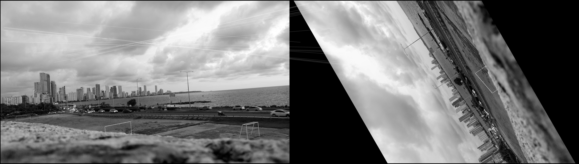
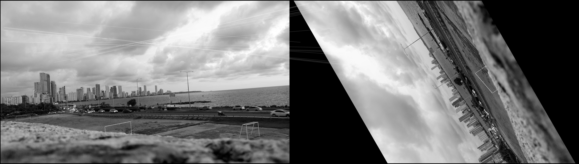
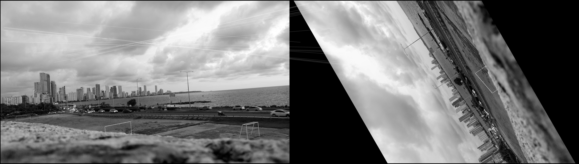
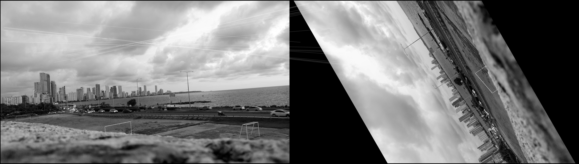
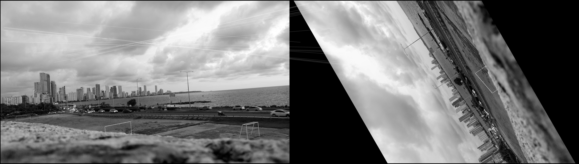
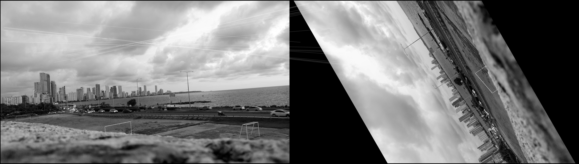
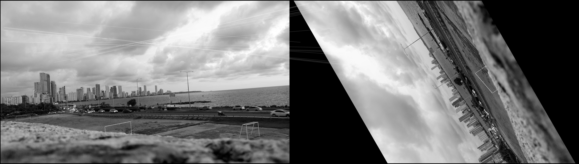
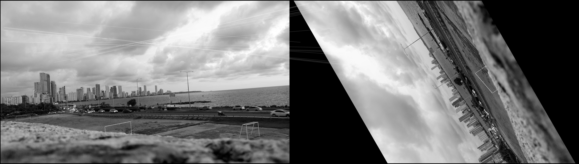
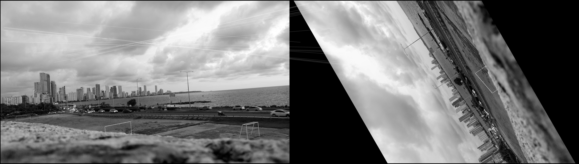
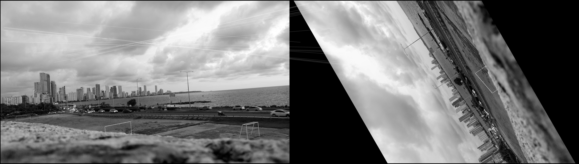
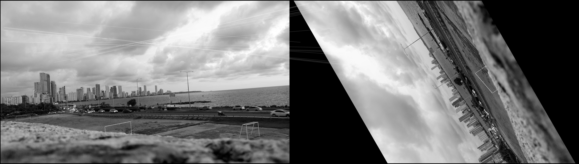
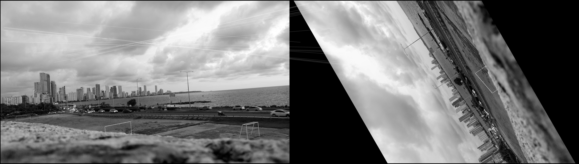
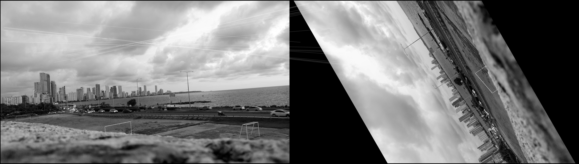
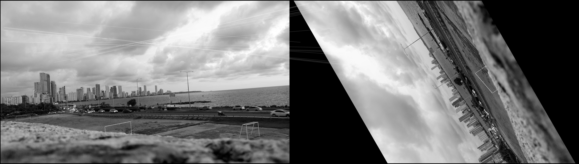
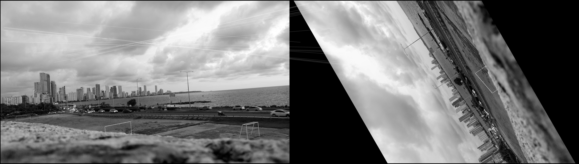
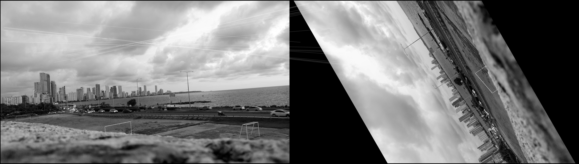
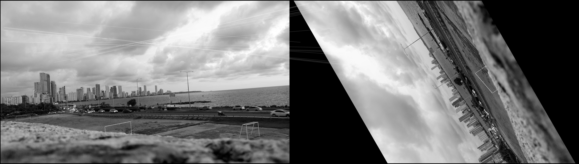
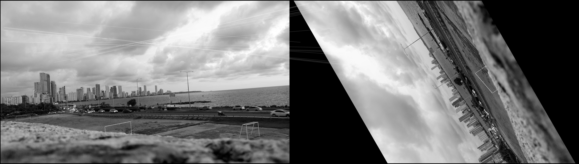
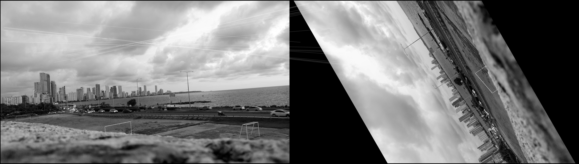
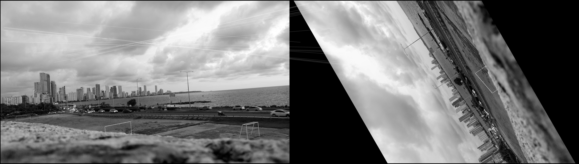

In [207]:
grid = hcat(img5, img6)
offset = CartesianIndex(0, size(img5, 2))
map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)

In [208]:
save("CARTBRISK.jpg", grid); 

In [ ]:
@time (desc_35, ret_features_5)

In [206]:
@time (matches3)

  0.000002 seconds


13-element Vector{Vector{CartesianIndex{2}}}:
 [CartesianIndex(1785, 1375), CartesianIndex(1851, 3196)]
 [CartesianIndex(1787, 1375), CartesianIndex(1850, 3198)]
 [CartesianIndex(1765, 1568), CartesianIndex(1694, 3082)]
 [CartesianIndex(1776, 1568), CartesianIndex(1688, 3091)]
 [CartesianIndex(1563, 1614), CartesianIndex(1755, 2883)]
 [CartesianIndex(1773, 1658), CartesianIndex(1612, 3043)]
 [CartesianIndex(1770, 1744), CartesianIndex(1539, 2998)]
 [CartesianIndex(1481, 2032), CartesianIndex(1434, 2604)]
 [CartesianIndex(1140, 2871), CartesianIndex(876, 1888)]
 [CartesianIndex(1140, 2872), CartesianIndex(878, 1889)]
 [CartesianIndex(1139, 2963), CartesianIndex(820, 1852)]
 [CartesianIndex(1140, 3088), CartesianIndex(690, 1781)]
 [CartesianIndex(1580, 3351), CartesianIndex(242, 2030)]